In [1]:
import uproot
import pandas as pd
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

import pylib.style as pys
import pylib.preprocess as preprocess

In [6]:
def extract(trph):
    energies = trph.arrays(expressions=['phen', 'phth', 'phphi', 'phrho', 'simtype', 'pherr'], cut='(nt==0)&(nph==4)')
    energies['px'] = energies['phen']*np.sin(energies['phth'])*np.cos(energies['phphi'])
    energies['py'] = energies['phen']*np.sin(energies['phth'])*np.sin(energies['phphi'])
    energies['pz'] = energies['phen']*np.cos(energies['phth'])
    f = lambda x, inds: np.square( np.sum(energies[x, :, inds], axis=1) )
    minv = lambda inds: np.sqrt( f('phen', inds) - ( f('px', inds) + f('py', inds) + f('pz', inds) ) )
    energies['ksmass'] = minv([0, 1, 2, 3])
    energies['pimass1'] = minv([0, 1])
    energies['pimass2'] = minv([2, 3])
    energies['pimass3'] = minv([0, 2])
    energies['pimass4'] = minv([1, 3])
    mpi = 134.98
    energies['h1'] = np.sqrt((energies['pimass1'] - mpi)**2 + (energies['pimass2'] - mpi)**2)
    energies['h2'] = np.sqrt((energies['pimass3'] - mpi)**2 + (energies['pimass4'] - mpi)**2)
    energies['h1'] = np.where(np.isnan(energies['h1']), -100, energies['h1'])
    energies['h2'] = np.where(np.isnan(energies['h2']), -100, energies['h2'])
    energies['h'] = np.where(energies['h2']<energies['h1'], energies['h2'], energies['h1'])
    energies['ebeam'] = np.sum(energies['phen'], axis=1)
    return energies

In [7]:
trph_mc = uproot.open('/store17/petrov/data/kskl20/tr_ph/19/tr_ph_kskl_537.5_70914.root')['tr_ph']
en = extract(trph_mc)

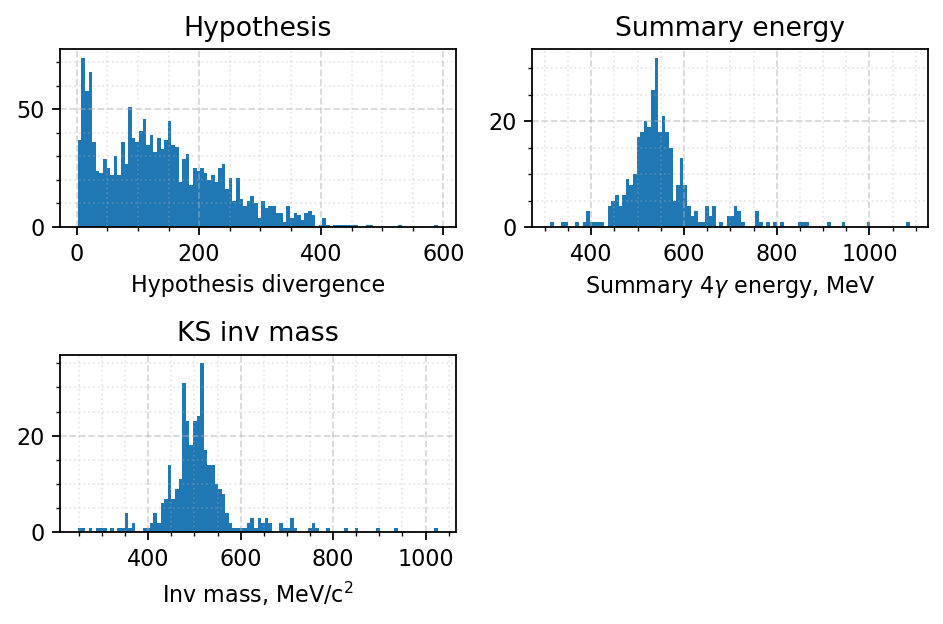

In [4]:
hyp_cut = 50
ebeam0, ebeam_cut = 537.5, 550
plt.figure(dpi=160)
plt.subplot(221)
plt.hist(en['h'], bins=100);
pys.my_style('Hypothesis', xtitle='Hypothesis divergence')
plt.subplot(222)
plt.hist(en[en['h']<hyp_cut, 'ebeam'], bins=100);
pys.my_style('Summary energy', xtitle='Summary 4$\\gamma$ energy, MeV')
plt.subplot(223)
plt.hist(en[(en['h']<hyp_cut) & (np.abs(en['ebeam']-ebeam0)<ebeam_cut), 'ksmass'], bins=100);
pys.my_style('KS inv mass', xtitle='Inv mass, MeV/c${}^2$');

In [5]:
trph_exp = uproot.open('root://sl10cmd//scan2019/scan2019_tr_ph_fc_e537.5_v7.root')['tr_ph']
enexp = extract(trph_exp)

/store17/petrov/anaconda3/lib/python3.7/site-packages/awkward/_connect/_numpy.py:151: RuntimeWarning: invalid value encountered in sqrt
  *[nplike.asarray(x) for x in inputs], **kwargs


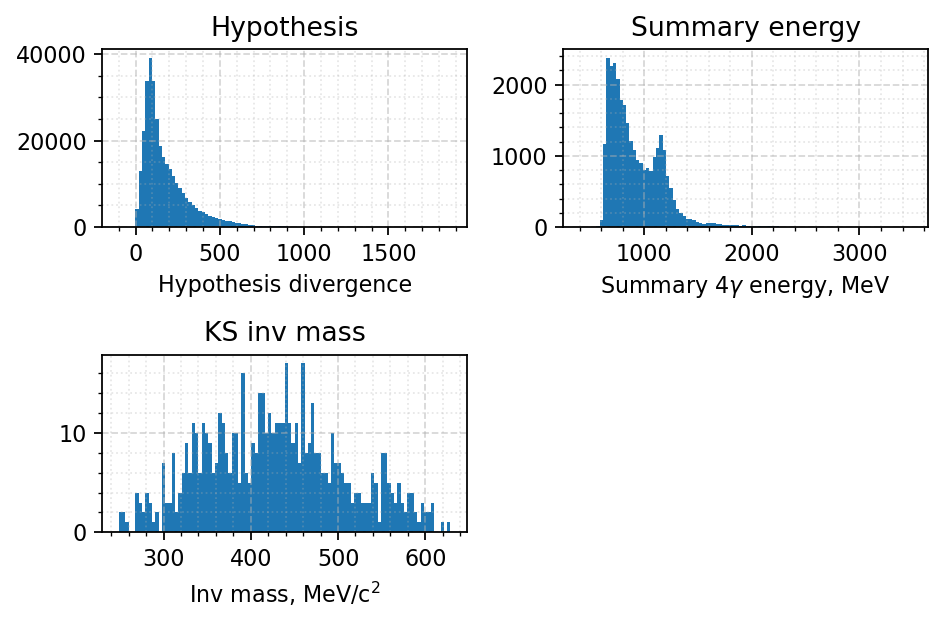

In [19]:
hyp_cut = 50
ebeam0, ebeam_cut = 537.5, 100
plt.figure(dpi=160)
plt.subplot(221)
plt.hist(enexp['h'], bins=100);
pys.my_style('Hypothesis', xtitle='Hypothesis divergence')
plt.subplot(222)
plt.hist(enexp[enexp['h']<hyp_cut, 'ebeam'], bins=100);
pys.my_style('Summary energy', xtitle='Summary 4$\\gamma$ energy, MeV')
plt.subplot(223)
plt.hist(enexp[(enexp['h']<hyp_cut) & (np.abs(enexp['ebeam']-ebeam0)<ebeam_cut), 'ksmass'], bins=100);
pys.my_style('KS inv mass', xtitle='Inv mass, MeV/c${}^2$');